# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Learning Objectives
- Produce a model with l2 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with l1 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with both l1 and l2 regularization terms, with a statistically significant improvement over a model without regularization.
- Produce a logistic regression model with a statistically significant improvement over the null model (a model without input - variables).
- Produce a generalized additive model with a statistically significant improvement over the null model (a model without input variables).

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns

train = pd.read_csv('House Prices.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 Question 1.1: Drop the Id columns from both train and test as these are not needed for prediction

In [73]:
train.drop("Id", axis = 1, inplace = True)

 Question 1.2: Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

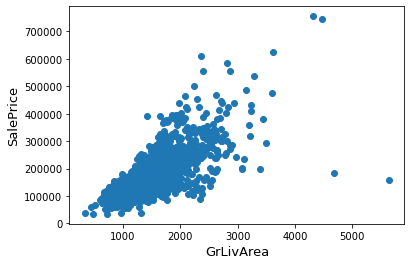

In [74]:
import matplotlib.pyplot as plt

plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

 Question 1.3: Removing outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

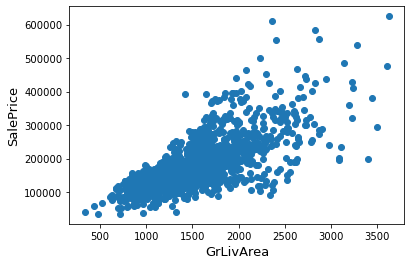

In [75]:
# Remove outliers for train['GrLivArea']>4000
train = train.drop(train[(train['GrLivArea']>4000)].index)

plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Quesiont 2.1: Convert categorical variable into dummy variables using pandas get_dummies API


In [76]:
train = pd.get_dummies(train)

Question 2.2: Impute missing data by the median of each column.

In [77]:
train.replace('NaN', np.nan, inplace=True)
train = train.fillna(train.median())
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [78]:
train.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 288, dtype: int64

Question 2.3: Generate train test split 70/30

In [79]:
from sklearn.model_selection import train_test_split

X = train.drop(['SalePrice'], 1)
y = train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Question 3.1: Train a linear regression algorithm to predict `SalePrice` from the remaining features.

In [80]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.metrics import mean_squared_error

#Fit a linear regression model to this data
regr = LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

Question 3.2: Evaluate the model and report the performance on both training and test data. These numbers will serve as our benchmark performance.

In [81]:
#Compute the RMSE 
y_pred = regr.predict(X_test)
meanSquaredError=mean_squared_error(y_test, y_pred)
rootMeanSquaredError = np.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

RMSE: 23658.194192960553


We now train a regularized version of `LinearRegression` called `Lasso` (you can load it from the same library). `Lasso` has an argument called `alpha`, which is the **shrinkage parameter** we referred to earlier.

Question 4.1: Let `alpha = 0.000001` and train a `Lasso` algorithm. Show that the resulting model is practically identical to the one we trained with `LinearRegression`. There are different ways to show this, so you will need to think of a way. <span style="color:red" float:right>[2 point]</span>

In [82]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha = 0.000001)
lasso.fit(X_train, y_train)

#Compute the RMSE 
y_pred = lasso.predict(X_test)
meanSquaredError=mean_squared_error(y_test, y_pred)
rootMeanSquaredError = np.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

RMSE: 23838.971498858617


C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167611534487.62134, tolerance: 634515517.3913862
  positive)


Question 4.2: Iteratively train a new `Lasso` model, letting `alpha` change each time to one of the values given by `alpha_vals` below, keeping track of the performance on the training and test data each time, and storing the model's coefficients each time (the `coef_` attribute of the trained model)

In [83]:
alpha_vals = np.arange(0.01, 5, .01) # values of alpha we want to iterate over

# pd.DataFrame({'linreg': linreg.coef_, 'lasso': clf.coef_}).head(10)

iter_coefs = pd.DataFrame(columns = ['alpha', 'col', 'coef'])
iter_train_perf = []
iter_test_perf = []

for alpha in alpha_vals:
    clf = linear_model.Lasso(alpha = alpha)
    clf.fit(X_train, y_train)
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)
    rmse_train = mean_squared_error(y_train, y_hat_train) ** 0.5
    rmse_test = mean_squared_error(y_test, y_hat_test) ** 0.5
    iter_train_perf.append(rmse_train)
    iter_test_perf.append(rmse_test)
    dd = pd.DataFrame({'col': X_train.columns, 'coef': clf.coef_})
    dd['alpha'] = alpha
    iter_coefs = iter_coefs.append(dd, sort = False)

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167544848368.20547, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167495139639.2256, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167414907895.3185, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167756664154.46606, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166361144109.20782, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162240581832.88382, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166761242388.7766, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164812086497.8685, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166916081713.25406, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167795479346.20877, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167791290408.37878, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167787153512.90744, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167099586455.0237, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167118397784.03918, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167135961510.3448, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166315749775.6961, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166276474082.046, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166238831637.21753, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162897673137.50818, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162741902636.42368, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162597035095.09024, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158518384408.21246, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158468557426.79172, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158419814369.22256, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156899095109.42816, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156860888374.1901, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156823304719.52435, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155955484039.80164, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155886069301.66168, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155820144669.11032, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156017353023.30518, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155999632626.86765, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155982355366.2909, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152063639317.72842, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151986534936.92783, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151912787913.0354, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149974736518.17975, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149875978505.91977, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149780035562.8156, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147132016351.58548, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147019458927.78207, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146900772371.8141, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144675367872.58105, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144595279068.1764, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144515061575.41675, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147862899874.84442, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147795936997.85965, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147731882779.3795, tolerance: 634515517.3913862
  positive)
C:\Users\mam_0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Question 4.3: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

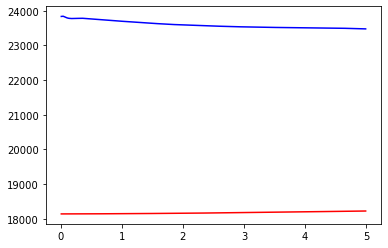

In [84]:
sns.lineplot(x = alpha_vals, y = iter_train_perf, color = 'red');
sns.lineplot(x = alpha_vals, y = iter_test_perf, color = 'blue');

Question 4.4: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`. HINT: They should appear to be shrinking toward zero as you increase `alpha`!

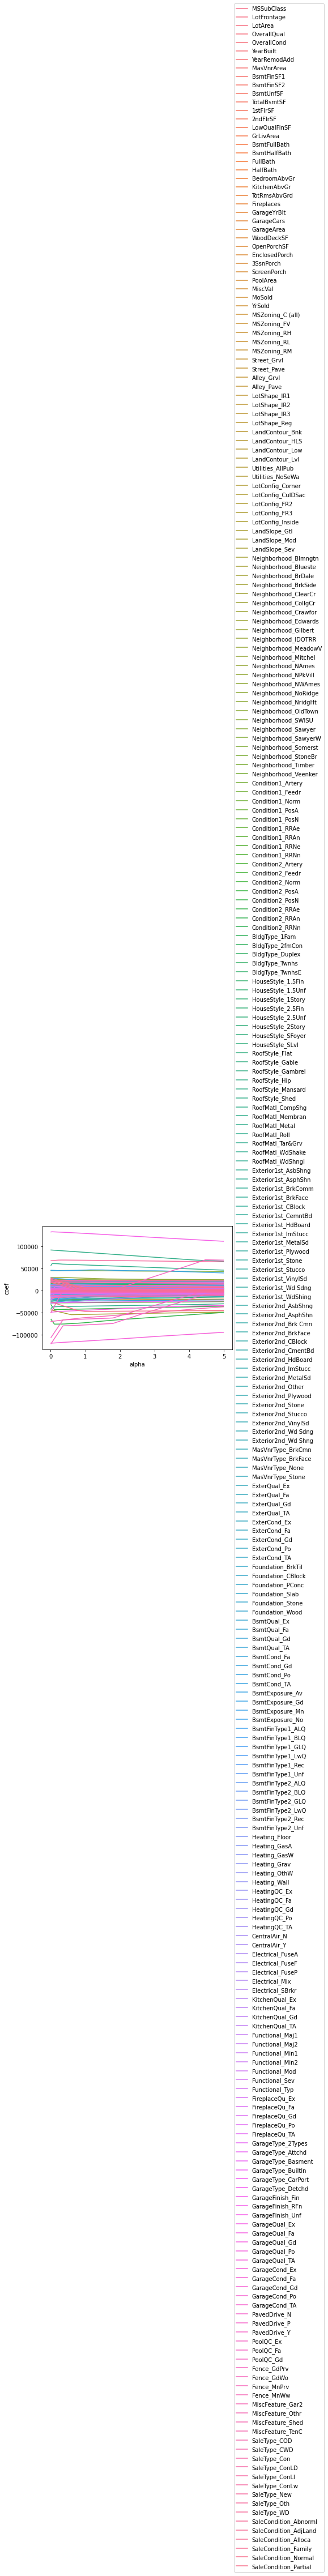

In [85]:
ax = sns.lineplot(x = 'alpha', y = 'coef', hue = 'col', data = iter_coefs)
# ax.set(ylim = (-2.5, 2.5))
ax.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5), ncol = 1);

Question 5.1: Repeat steps in Question 4 this time using `Ridge` instead of `Lasso`. We will use the following range for `alpha`: <span style="color:red" float:right>[2 point]

In [86]:
alpha_vals = np.arange(0.1, 200, 1)

In [87]:
# pd.DataFrame({'linreg': linreg.coef_, 'lasso': clf.coef_}).head(10)

iter_coefs = pd.DataFrame(columns = ['alpha', 'col', 'coef'])
iter_train_perf = []
iter_test_perf = []

for alpha in alpha_vals:
    clf = linear_model.Ridge(alpha = alpha)
    clf.fit(X_train, y_train)
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)
    rmse_train = mean_squared_error(y_train, y_hat_train) ** 0.5
    rmse_test = mean_squared_error(y_test, y_hat_test) ** 0.5
    iter_train_perf.append(rmse_train)
    iter_test_perf.append(rmse_test)
    dd = pd.DataFrame({'col': X_train.columns, 'coef': clf.coef_})
    dd['alpha'] = alpha
    iter_coefs = iter_coefs.append(dd, sort = False)

Question 5.2: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

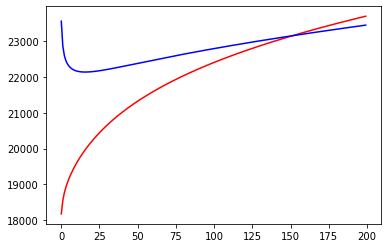

In [88]:
sns.lineplot(x = alpha_vals, y = iter_train_perf, color = 'red');
sns.lineplot(x = alpha_vals, y = iter_test_perf, color = 'blue');

Question 5.3: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`.

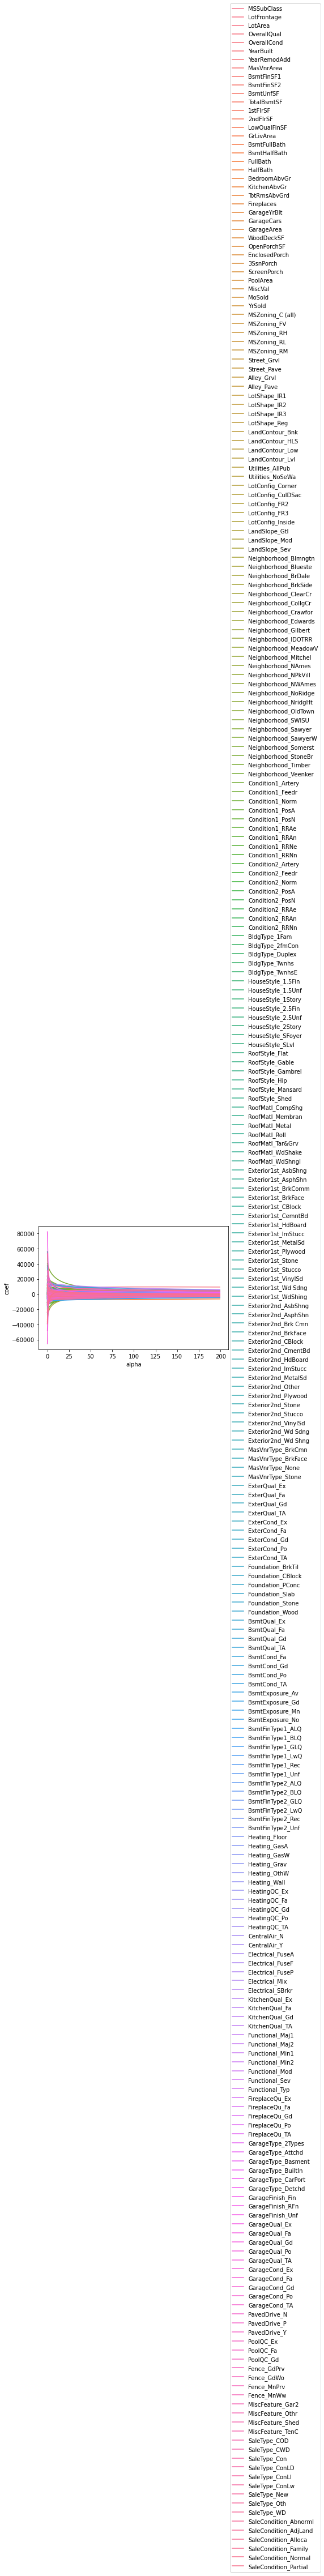

In [89]:
ax = sns.lineplot(x = 'alpha', y = 'coef', hue = 'col', data = iter_coefs)
ax.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5), ncol = 1);

Question 6: Repeat questions 5.1 - 5.3 using elasticnet experimenting with differnet values of alpha

Question 7: Based on the results, briefly describe the effect of changing `alpha` on the coefficients of both `Ridge`, `Lasso`, anf `ElasticNet`. What value of `alpha` would you choose for each case? You do not need to give a precise answer, but choose a number.